## Lernen im einfachen Netz

Gewichtsvektor am Ende des Trainings: 
[-1.  1.  1.]
Auswertung am Ende des Trainings: 
[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


Text(0, 0.5, '$(y - \\hat y)$')

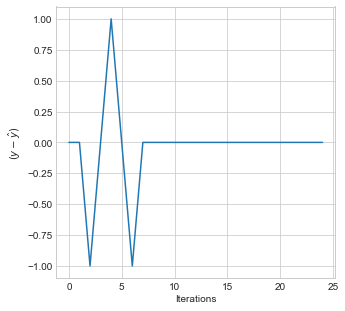

In [77]:
# Grafische Darstellung
import matplotlib.pyplot as plt

# Zufall
from random import choice

# Für die mathematischen Operationen
from numpy import array, dot, random, linspace, zeros

# Ganz wichtig sonst wird der Plot nicht angezeigt
%matplotlib inline

# Trainingsdaten 
# Pro Zeile: die binären Inputdaten und die gewünschte binäre Ausgabe 
# in einer Liste von Tupeln.
# An der Stelle 0 des Inputvektors ist das Bias-Neuron

training_data_set = [
    (array([1,0,0]), 0),
    (array([1,0,1]), 1),
    (array([1,1,0]), 1),
    (array([1,1,1]), 1),
]

# Die Heaviside-Stufenfunktion als Lambda-Funktion
heaviside = lambda x: 0 if x < 0 else 1

# Anfangsinitialisierung der Zufallgenerators wegen
# Reproduzierbarkeit der Ergebnisse 
random.seed(18)

# Array von Länge 3 mit 0 initialisieren
w = zeros(3)

# Die Anzahl der Durchläufe. Erfahrungswert durch Probieren
iterations = 25

# Start des Trainierens
def fit(iterations, training_data_set, w):
    """
        Lernen im Perceptron
            iterations: Ein Vorwärts- und Rückwärtslauf aller Trainingsbeispiele
            trainings_data_set: Die Trainingsbeispiele
            w: Die Gewichte zum Start
    """

    errors = []
    weights = []

    for index in range(iterations):
        # zufällige Auswahl eines Trainingsbeispieles
        training_data = choice(training_data_set)
        x = training_data[0]
        y = training_data[1]

        # Den errechneten Output ermitteln: Gewichtete Summe mit
        # nachgelagerter Stufenfunktion
        y_hat = heaviside(dot(w,x))

        # Fehler berechnen als Differenz zwischen gewünschten und 
        # aktuellen Output
        error = y - y_hat

        # Fehler sammeln für die Ausgabe
        errors.append(error)

        # Gewichte sammeln für die spätere Ausgabe
        weights.append(w)

        # Gewichtsanpassung = Das Lernen... x_i ist entweder 0 oder 1
        w += error * x

    # Rückgabe der Fehler und Gewichte
    return errors, weights

# Trainieren
# Wir sammeln die Fehler/ Gewichte in jdem Schritt für die grafische Ausgabe
errors, weights = fit(iterations, training_data_set, w)

# Den letzten Gewichtsvektor ausgeben
w = weights[iterations - 1]

print("Gewichtsvektor am Ende des Trainings: ")
print((w))

# Auswertung nach dem Trainieren
print ("Auswertung am Ende des Trainings: ")
for x, y in training_data_set:
    y_hat = heaviside(dot(x, w))
    print("{}: {} -> {}".format(x,y,y_hat))

#-----------------------------------------------------------------------

# Grafik für Fehler pro Lernbeispiel
# Figuren-Nummern start
fignr = 1

# Druckgröße in Inch
plt.figure(fignr, figsize=(5,5))

# Ausgabe Fehler als Plot
plt.plot(errors)

# Raster
plt.style.use('seaborn-whitegrid')



# Labels
plt.xlabel('Iterations')
plt.ylabel(r"$(y - \hat y)$")
















## Linebreak

[1 0 0]: 0 -> 0
[1 0 1]: 1 -> 1
[1 1 0]: 1 -> 1
[1 1 1]: 1 -> 1


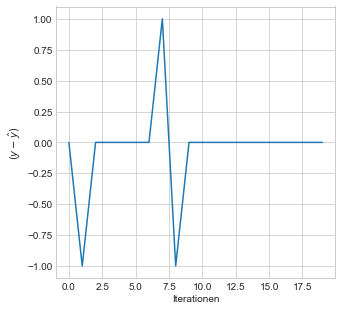

In [78]:
# Numpy
import numpy as np
# Basisklassen
from sklearn.base import BaseEstimator, ClassifierMixin
# Prüfroutine für die Konsistenz der Daten etc.
from sklearn.utils.validation import check_X_y, check_array, check_is_fitted, check_random_state
# Puffern der unterschiedlichen Zielwerte
from sklearn.utils.multiclass import unique_labels

%matplotlib inline

class PerceptronEstimator(BaseEstimator, ClassifierMixin):

    # Initialisierung
    def __init__(self, n_iterations=20, random_state=None):
        """
        Initialisierung der Objekte

        n_iteratiosn: Anzahl der Iterationen für das Lernen
        random_state: Um Wiederholbarkeiten zu garantieren, sollte ein numpy.random.RandomState-Objekt konsturierte werden,
                      das mit random_state Seed initialisiert wurde
        """

        # Die Anzahl der Iterationen 
        self.n_iterations = n_iterations
        # Der Seed für den Zufallsgenerator
        self.random_state = random_state
        # Die Fehler im Lernprozess für den Plot gepuffert
        self.errors = []

    def heaviside(self, x):
        """
        Eine Stufenfunktion

        x: Der Skalar, für das die Stufenfunktion ausgewertet wird
        """

        if x < 0:
            result = 0
        else:
            result = 1
        return result

    def fit(self, X=None, y=None):
        """
        Trainieren

        X: arrayähnliche Struktur mit [N,D], wobei 
           N = Zeilen = Anzahl der Lernbeispiele
           D = Spalten = Anzahl der Features
        y: Array mit [N], mit N so wie oben
        """

        # Erzeugen des Zufallsgenerators (RNG)
        self.random_state_ = check_random_state(self.random_state)
        # Gewichtinitialisierung
        # np.size(.,1) = Anzahl der Spalten
        self.w = self.random_state_.random_sample(np.size(X,1))

        # Prüfe, ob X und y die korrekte shape haben: X.shape[0] = y.shape[0]
        X,y = check_X_y(X,y)

        # Die eindeutigen Zielwerte speichern
        self.classses_ = unique_labels(y)

        # Lerndaten für spätere Prüfung in Methode predict speichern
        self.X_ = X
        self.y_ = y

        # Lernen
        for i in range(self.n_iterations):
            # zufälliges Durchwürfeln, für Batch Size = 1
            # np.size(.,0) = Anzahl der Zeilen
            rand_index = self.random_state_.randint(0, np.size(X,0))
            # Ein zufälliger Inputvektor
            x_ = X[rand_index]
            # Ein dazu passender Output
            y_ = y[rand_index]

            # Den errechneten Output ermitteln:
            # Gewichtete Summe mit nachgelagerter Stufenfunktion
            y_hat = self.heaviside(dot(self.w, x_))

            # Fehler berechnen als Differenz zwischen gewünschtem und aktuellem Output
            error = y_ - y_hat

            # Fehler sammeln für die Ausgabe
            self.errors.append(error)

            # Die Gewichtsanpassung = das Lernen
            self.w += error * x_

        #Rückgabe des Estimators für verknüpfte Aufrufe
        return self

    def predict(self, x):
        """
        Auswerten eines Vektors

        x: Ein Test-Input-Vektor
        """

        # Prüfen, ob fit bereits aufgerufen wurde
        # Die Daten wurden in der Methode fit gesetzt
        check_is_fitted(self, ['X_', 'y_'])

        #Auswerten, Forward Path
        y_hat = self.heaviside(dot(self.w, x))

        return y_hat

    def plot(self):
        """
        Ausgabe des Fehlers

        Die im Fehlerarray gespeicherten Fehler als Grafik ausgegeben
        """

        # Figure-.Nummern Start
        fignr = 1

        # Druckgröße in inch
        plt.figure(fignr,  figsize=(5,5))

        # Ausgabe Fehler als Plot
        plt.plot(self.errors)

        # Raster
        plt.style.use('seaborn-whitegrid')

        # Labels 
        plt.xlabel('Iterationen')
        plt.ylabel(r"$(y - \hat y)$")


# Trainingsdaten
X = np.array([[1,0,0], [1,0,1], [1,1,0], [1,1,1]])
y = np.array([0,1,1,1])

# Lernen
Perceptron = PerceptronEstimator(20,10)
Perceptron.fit(X,y)

# Testdaten
x = np.array([1,0,0])

# Auswertung
for index, x in enumerate(X):
    p = Perceptron.predict(x)
    print("{}: {} -> {}".format(x, y[index], p))

# Graph ausgeben
Perceptron.plot()

In [79]:
# scikit-learn-Perceptron
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# Den Iris-Datensatz laden
iris = load_iris()

# Die Eingabevektoren für das lernen 
# 150 Vektoren mit 5 Spalten
X = iris.data[:,(2,3)] #petal length, petal width
# Die gewünschten Werte
y = iris.target

# Das Perceptron instanziieren
perceptron = Perceptron(random_state=49,max_iter=100000,tol=None)

# Lernen
perceptron.fit(X,y)

# Auswerten Iris-setosa, Iris-versicolor, Iris-virginca
# Ausgabe
print(perceptron.predict([[1.4,0.2]]))
print(perceptron.predict([[3.5,0.9]]))
print(perceptron.predict([[6.0,2.5]]))

[0]
[1]
[2]













## Linebreak